<a href="https://colab.research.google.com/github/niteshkamboj2811/Python_Practice/blob/main/Pyspark_BQ_python_sql_interview_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##INSTALLING SPARK

# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# # install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3-scala2.13.tgz

# # unzip the spark file to the current folder
!tar xf spark-3.5.0-bin-hadoop3-scala2.13.tgz

# # set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3-scala2.13"
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.amazonaws:aws-java-sdk-pom:1.11.538,org.apache.hadoop:hadoop-aws:2.7.3 pyspark-shell'


# # install findspark using pip
!pip install --quiet findspark

# # install pyspark using pip

In [ ]:
##INSTALLING BQ

# Authenticate your colab environment
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# Import pandas library
#import pandas as pd

# Import Google Big Query (GCP) extension of Pandas to be able to query against tables in GCP
import pandas_gbq
from google.cloud import bigquery
%load_ext google.cloud.bigquery

Authenticated


In [ ]:
import findspark
findspark.init()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark_df = spark.read.option('Header', True).csv("/content/drive/MyDrive/Resume/2023/Practice_Python_SQL_PYsrpak/amazon.csv")

spark_df.createOrReplaceTempView('spark_df_table')

In [ ]:
pandas_df = pandas_gbq.read_gbq("""SELECT * FROM  `bigquery-public-data.google_analytics_sample.ga_sessions_20170801` LIMIT 2000""", project_id='fifth-inkwell-303205')

pandas_df

Downloading: 100%|██████████|


In [ ]:
type(pandas_df)

pandas.core.frame.DataFrame

In [ ]:
spark_df.columns

['product_id',
 'product_name',
 'category',
 'discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count',
 'about_product',
 'user_id',
 'user_name',
 'review_id',
 'review_title',
 'review_content',
 'img_link',
 'product_link']

In [ ]:
# df_1 = df_1['standardTimestamp','ip','estid','yobi_hem_md5','android_id']

In [ ]:
pandas_df.columns

Index(['visitorId', 'visitNumber', 'visitId', 'visitStartTime', 'date',
       'totals', 'trafficSource', 'device', 'geoNetwork', 'customDimensions',
       'hits', 'fullVisitorId', 'userId', 'clientId', 'channelGrouping',
       'socialEngagementType'],
      dtype='object')

In [ ]:
spark_df.show(5)

+----------+--------------------+--------------------+----------------+------------+-------------------+------+------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|product_id|        product_name|            category|discounted_price|actual_price|discount_percentage|rating|rating_count|        about_product|             user_id|           user_name|           review_id|        review_title|      review_content|            img_link|        product_link|
+----------+--------------------+--------------------+----------------+------------+-------------------+------+------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|B07JW9H4J1|Wayona Nylon Brai...|Computers&Accesso...|            ₹399|      ₹1,099|                64%|   4.2|      2

In [ ]:
pandas_df.head(5)

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,<NA>,1,1501591568,1501591568,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'South...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 5, 'minut...",3418334011779872055,None,None,Organic Search,Not Socially Engaged
1,<NA>,2,1501589647,1501589647,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 5, 'minut...",2474397855041322408,None,None,Referral,Not Socially Engaged
2,<NA>,1,1501616621,1501616621,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",5870462820713110108,None,None,Referral,Not Socially Engaged
3,<NA>,1,1501601200,1501601200,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 8, 'minut...",9397809171349480379,None,None,Referral,Not Socially Engaged
4,<NA>,1,1501615525,1501615525,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6089902943184578335,None,None,Referral,Not Socially Engaged


--For each estid count it's occurance in a new column order by the counts/new col<br><br>
**SELECT estid, count(DISTINCT android_id_exploded) as countuniqe
FROM df
LATERAL VIEW explode(android_id) as android_id_exploded
GROUP BY estid
ORDER BY countuniqe DESC;**

In [ ]:
from pyspark.sql.functions import explode, countDistinct, desc

In [ ]:
df_1_exploded = df_1.select("estid", explode("android_id").alias("exploded_android_id"))

# New Section

# New Section

In [ ]:
df1 = spark.read.option('Header', True).csv("/content/sample_data_for_window_().csv")
df1.createOrReplaceTempView('df1')

In [ ]:
type()

SyntaxError: ignored

In [ ]:
# download Northwind SQLite DB
!wget https://tdmdal.github.io/mma-sql-2021/data/northwind.sqlite3

--2023-10-09 17:27:14--  https://tdmdal.github.io/mma-sql-2021/data/northwind.sqlite3
Resolving tdmdal.github.io (tdmdal.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to tdmdal.github.io (tdmdal.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 804864 (786K) [application/octet-stream]
Saving to: ‘northwind.sqlite3’

northwind.sqlite3   100%[===================>] 786.00K  --.-KB/s    in 0.03s   

2023-10-09 17:27:15 (22.8 MB/s) - ‘northwind.sqlite3’ saved [804864/804864]



In [ ]:
# load the SQL magic extension
# https://github.com/catherinedevlin/ipython-sql
# this extension allows us to connect to DBs and issue SQL command
%load_ext sql

# now we can use the magic extension to connect to our SQLite DB
# use %sql to write an inline SQL command
# use %%sql to write SQL commands in a cell
%sql sqlite:///northwind.sqlite3

In [ ]:
%%sql
SELECT sqlite_version();

 * sqlite:///northwind.sqlite3
Done.


sqlite_version()
3.37.2


In [ ]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

 * sqlite:///northwind.sqlite3
Done.


name
Suppliers
Shippers
Employees
Customers
Orders
Categories
Products
OrderDetails


In [ ]:
%sql PRAGMA table_info(Employees);

 * sqlite:///northwind.sqlite3
Done.


cid,name,type,notnull,dflt_value,pk
0,EmployeeID,INTEGER,1,None,1
1,LastName,nvarchar(20),1,None,0
2,FirstName,nvarchar(10),1,None,0
3,Title,nvarchar(30),0,None,0
4,TitleOfCourtesy,nvarchar(25),0,None,0
5,BirthDate,datetime,0,None,0
6,HireDate,datetime,0,None,0
7,Address,nvarchar(60),0,None,0
8,City,nvarchar(15),0,None,0
9,Region,nvarchar(15),0,None,0


In [ ]:
%%sql
SELECT FirstName,
LastName,
Title,
DATE(BirthDate)
FROM Employees
ORDER BY 4

 * sqlite:///northwind.sqlite3
Done.


FirstName,LastName,Title,DATE(BirthDate)
Margaret,Peacock,Sales Representative,1955-09-19
Nancy,Davolio,Sales Representative,1966-12-08
Andrew,Fuller,"Vice President, Sales",1970-02-19
Steven,Buchanan,Sales Manager,1973-03-04
Laura,Callahan,Inside Sales Coordinator,1976-01-09
Robert,King,Sales Representative,1978-05-29
Michael,Suyama,Sales Representative,1981-07-02
Janet,Leverling,Sales Representative,1981-08-30
Anne,Dodsworth,Sales Representative,1984-01-27


In [ ]:
%%sql
SELECT FirstName,
LastName,
UPPER(LastName) ||', '||FirstName
FROM Employees

 * sqlite:///northwind.sqlite3
Done.


FirstName,LastName,"UPPER(LastName) ||', '||FirstName"
Nancy,Davolio,"DAVOLIO, Nancy"
Andrew,Fuller,"FULLER, Andrew"
Janet,Leverling,"LEVERLING, Janet"
Margaret,Peacock,"PEACOCK, Margaret"
Steven,Buchanan,"BUCHANAN, Steven"
Michael,Suyama,"SUYAMA, Michael"
Robert,King,"KING, Robert"
Laura,Callahan,"CALLAHAN, Laura"
Anne,Dodsworth,"DODSWORTH, Anne"


In [ ]:
%%sql
SELECT *
FROM OrderDetails
LIMIT 10

 * sqlite:///northwind.sqlite3
Done.


OrderID,ProductID,UnitPrice,Quantity,Discount
10248,11,14,12,0.0
10248,42,9.8,10,0.0
10248,72,34.8,5,0.0
10249,14,18.6,9,0.0
10249,51,42.4,40,0.0
10250,41,7.7,10,0.0
10250,51,42.4,35,0.15
10250,65,16.8,15,0.15
10251,22,16.8,6,0.05
10251,57,15.6,15,0.05


In [ ]:
%%sql
SELECT OrderID,
ProductID,
Quantity,
UnitPrice,
UnitPrice*Quantity AS TotalPrice
FROM OrderDetails
WHERE UnitPrice*Quantity>12000
ORDER BY 2, 4 DESC

 * sqlite:///northwind.sqlite3
Done.


OrderID,ProductID,Quantity,UnitPrice,TotalPrice
10865,38,60,263.5,15810.0
10981,38,60,263.5,15810.0


In [ ]:
%%sql
SELECT ProductID,
ProductName,
UnitsInStock,
UnitsOnOrder,
ReorderLevel,
Discontinued
FROM Products
WHERE UnitsInStock + UnitsOnOrder <= ReorderLevel
AND Discontinued = 0

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
30,Nord-Ost Matjeshering,10,0,15,0
70,Outback Lager,15,10,30,0


In [ ]:
%%sql
SELECT *
FROM OrderDetails
LIMIT 10

 * sqlite:///northwind.sqlite3
Done.


OrderID,ProductID,UnitPrice,Quantity,Discount
10248,11,14,12,0.0
10248,42,9.8,10,0.0
10248,72,34.8,5,0.0
10249,14,18.6,9,0.0
10249,51,42.4,40,0.0
10250,41,7.7,10,0.0
10250,51,42.4,35,0.15
10250,65,16.8,15,0.15
10251,22,16.8,6,0.05
10251,57,15.6,15,0.05


In [ ]:
%%sql
SELECT OrderID+ProductID AS Order_item,
MIN(UnitPrice),
MAX(UnitPrice),
ROUND(AVG(UnitPrice),2)
FROM OrderDetails
GROUP BY 1
LIMIT 10

 * sqlite:///northwind.sqlite3
Done.


Order_item,MIN(UnitPrice),MAX(UnitPrice),"ROUND(AVG(UnitPrice),2)"
10257,15.2,15.2,15.2
10259,14,14,14.0
10260,15.2,15.2,15.2
10263,17,18.6,17.8
10266,15.2,15.2,15.2
10267,17,17,17.0
10269,24,24,24.0
10271,13.9,13.9,13.9
10272,64.8,64.8,64.8
10273,16.8,16.8,16.8


In [ ]:
%%sql
SELECT *
FROM Suppliers
LIMIT 10

 * sqlite:///northwind.sqlite3
Done.


SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None
2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,None
4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,None,100,Japan,(03) 3555-5011,None,None
5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,None,None
6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko Chuo-ku,Osaka,None,545,Japan,(06) 431-7877,None,Mayumi's (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/mayumi.htm#
7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St. Moonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,None
8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,None,M14 GSD,UK,(161) 555-4448,None,None
9,PB Knäckebröd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Göteborg,None,S-345 67,Sweden,031-987 65 43,031-987 65 91,None
10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,Sao Paulo,None,5442,Brazil,(11) 555 4640,None,None


In [ ]:
%%sql
SELECT ContactTitle,
COUNT(1) AS total_customers,
COUNT(DISTINCT ContactName) AS unique_customers
FROM Suppliers
GROUP BY 1

 * sqlite:///northwind.sqlite3
Done.


ContactTitle,total_customers,unique_customers
Accounting Manager,2,2
Coordinator Foreign Markets,1,1
Export Administrator,1,1
International Marketing Mgr.,1,1
Marketing Manager,5,5
Marketing Representative,1,1
Order Administrator,2,2
Owner,1,1
Product Manager,1,1
Purchasing Manager,1,1


In [ ]:
%%sql
SELECT *
FROM Customers
LIMIT 10

 * sqlite:///northwind.sqlite3
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [ ]:
%%sql
SELECT country,
city,
COUNT(customerid)
FROM Customers
GROUP BY 1, 2
ORDER BY 3 DESC

 * sqlite:///northwind.sqlite3
Done.


Country,City,COUNT(customerid)
UK,London,6
Mexico,México D.F.,5
Brazil,Sao Paulo,4
Argentina,Buenos Aires,3
Brazil,Rio de Janeiro,3
Spain,Madrid,3
France,Nantes,2
France,Paris,2
Portugal,Lisboa,2
USA,Portland,2


In [ ]:
%%sql
SELECT ProductID,
ProductName,
CompanyName
FROM Products
INNER JOIN Suppliers
USING(SupplierID)
ORDER BY 1 DESC

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,CompanyName
77,Original Frankfurter grüne Soße,Plutzer Lebensmittelgroßmärkte AG
76,Lakkalikööri,Karkki Oy
75,Rhönbräu Klosterbier,Plutzer Lebensmittelgroßmärkte AG
74,Longlife Tofu,Tokyo Traders
73,Röd Kaviar,Svensk Sjöföda AB
72,Mozzarella di Giovanni,Formaggi Fortini s.r.l.
71,Flotemysost,Norske Meierier
70,Outback Lager,"Pavlova, Ltd."
69,Gudbrandsdalsost,Norske Meierier
68,Scottish Longbreads,"Specialty Biscuits, Ltd."


In [ ]:
%%sql
SELECT OrderID, DATE(OrderDate), CompanyName
FROM Orders
INNER JOIN Shippers
ON ShipVia=ShipperID
WHERE OrderID < 10255

 * sqlite:///northwind.sqlite3
Done.


OrderID,DATE(OrderDate),CompanyName
10248,2014-07-04,Federal Shipping
10249,2014-07-05,Speedy Express
10250,2014-07-08,United Package
10251,2014-07-08,Speedy Express
10252,2014-07-09,United Package
10253,2014-07-10,United Package
10254,2014-07-11,United Package


In [ ]:
%%sql
SELECT CategoryName, COUNT(DISTINCT ProductName)
FROM Categories
INNER JOIN Products
USING(CategoryID)
GROUP BY 1
ORDER BY 2 DESC

 * sqlite:///northwind.sqlite3
Done.


CategoryName,COUNT(DISTINCT ProductName)
Confections,13
Beverages,12
Condiments,12
Seafood,12
Dairy Products,10
Grains/Cereals,7
Meat/Poultry,6
Produce,5


In [ ]:
%%sql
SELECT OrderID, FLOOR(UnitPrice*Quantity) AS total_value
FROM Orders
INNER JOIN OrderDetails
USING(OrderID)
WHERE DATE(OrderDate) BETWEEN '2015-12-31' AND '2016-12-31'
GROUP BY 1
HAVING total_value > 12000

 * sqlite:///northwind.sqlite3
Done.


OrderID,total_value
10865,15810
10981,15810


In [ ]:
%%sql
SELECT DISTINCT EmployeeID,
FirstName,
LastName,
ProductID,
ProductName
FROM Employees
LEFT JOIN Orders
USING(EmployeeID)
LEFT JOIN OrderDetails
USING(OrderID)
LEFT JOIN Products
USING(ProductID)
WHERE LOWER(FirstName) = 'michael'
AND LOWER(LastName) = 'suyama'

 * sqlite:///northwind.sqlite3
Done.


EmployeeID,FirstName,LastName,ProductID,ProductName
6,Michael,Suyama,14,Tofu
6,Michael,Suyama,51,Manjimup Dried Apples
6,Michael,Suyama,2,Chang
6,Michael,Suyama,41,Jack's New England Clam Chowder
6,Michael,Suyama,33,Geitost
6,Michael,Suyama,20,Sir Rodney's Marmalade
6,Michael,Suyama,31,Gorgonzola Telino
6,Michael,Suyama,72,Mozzarella di Giovanni
6,Michael,Suyama,71,Flotemysost
6,Michael,Suyama,13,Konbu


In [ ]:
%%sql
SELECT CompanyName, OrderId
FROM Customers
LEFT JOIN Orders
USING(CustomerId)
WHERE OrderId IS NULL

 * sqlite:///northwind.sqlite3
Done.


CompanyName,OrderID
FISSA Fabrica Inter. Salchichas S.A.,None
Paris spécialités,None


In [ ]:
%%sql
SELECT DISTINCT CompanyName AS customer
FROM customers
LEFT JOIN Orders
USING(CustomerId)
WHERE EmployeeId != 4

 * sqlite:///northwind.sqlite3
Done.


customer
Vins et alcools Chevalier
Toms Spezialitäten
Victuailles en stock
Hanari Carnes
Chop-suey Chinese
Richter Supermarkt
Wellington Importadora
Ernst Handel
Rattlesnake Canyon Grocery
Folk och fä HB


In [ ]:
%%sql
SELECT CompanyName, OrderId, SUM(UnitPrice*Quantity)
FROM Customers
INNER JOIN Orders
USING(CustomerID)
INNER JOIN OrderDetails
USING(OrderID)
WHERE UnitPrice*Quantity >= 15000
AND DATE(OrderDate) BETWEEN '2015-12-31' AND '2016-12-31'
GROUP BY 1

 * sqlite:///northwind.sqlite3
Done.


CompanyName,OrderID,SUM(UnitPrice*Quantity)
Hanari Carnes,10981,15810.0
QUICK-Stop,10865,15810.0


In [ ]:
%%sql
WITH cte_oldest_emp AS (
  SELECT EmployeeID, FirstName, DATE(BirthDate) AS B_day
  FROM Employees
  ORDER BY B_day
  LIMIT 1
)
SELECT EmployeeID, FirstName, COUNT(OrderID)
FROM Orders
INNER JOIN cte_oldest_emp
USING(EmployeeID)
GROUP BY 1, 2

 * sqlite:///northwind.sqlite3
Done.


EmployeeID,FirstName,COUNT(OrderID)
4,Margaret,156


In [ ]:
 %%sql
 WITH cte_total AS (
  SELECT EmployeeID,
  COUNT(OrderID) AS total_number_of_orders,
  RequiredDate,
  ShippedDate,
  SUM(CASE WHEN RequiredDate <= ShippedDate THEN 1 END) AS late_orders
  FROM Orders
  GROUP BY 1
  HAVING SUM(CASE WHEN RequiredDate <= ShippedDate THEN 1 END) > 0
 )

 SELECT EmployeeID,
 LastName,
 total_number_of_orders,
 late_orders,
 ROUND(late_orders/total_number_of_orders, 2) AS perc_of_later_orders
 FROM cte_total
 INNER JOIN Employees
 USING(EmployeeID)

 * sqlite:///northwind.sqlite3
Done.


EmployeeID,LastName,total_number_of_orders,late_orders,perc_of_later_orders
1,Davolio,123,3,0.0
2,Fuller,96,4,0.0
3,Leverling,127,5,0.0
4,Peacock,156,10,0.0
6,Suyama,67,3,0.0
7,King,72,4,0.0
8,Callahan,104,5,0.0
9,Dodsworth,43,5,0.0


In [ ]:
%%sql
SELECT sql
FROM sqlite_master
WHERE type='table' AND name IN ('Orders', 'Customers')

 * sqlite:///northwind.sqlite3
Done.


sql
"CREATE TABLE [Customers] ( [CustomerID] nchar(5) NOT NULL, [CompanyName] nvarchar(40) NOT NULL COLLATE NOCASE, [ContactName] nvarchar(30) NULL COLLATE NOCASE, [ContactTitle] nvarchar(30) NULL COLLATE NOCASE, [Address] nvarchar(60) NULL COLLATE NOCASE, [City] nvarchar(15) NULL COLLATE NOCASE, [Region] nvarchar(15) NULL COLLATE NOCASE, [PostalCode] nvarchar(10) NULL COLLATE NOCASE, [Country] nvarchar(15) NULL COLLATE NOCASE, [Phone] nvarchar(24) NULL COLLATE NOCASE, [Fax] nvarchar(24) NULL COLLATE NOCASE, CONSTRAINT [PK_Customers] PRIMARY KEY ([CustomerID]))"
"CREATE TABLE [Orders] ( [OrderID] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [CustomerID] nchar(5) NOT NULL COLLATE NOCASE, [EmployeeID] int NULL, [OrderDate] datetime NULL, [RequiredDate] datetime NULL, [ShippedDate] datetime NULL, [ShipVia] int NULL, [Freight] money DEFAULT 0 NULL, [ShipName] nvarchar(40) NULL COLLATE NOCASE, [ShipAddress] nvarchar(60) NULL COLLATE NOCASE, [ShipCity] nvarchar(15) NULL COLLATE NOCASE, [ShipRegion] nvarchar(15) NULL COLLATE NOCASE, [ShipPostalCode] nvarchar(10) NULL COLLATE NOCASE, [ShipCountry] nvarchar(15) NULL COLLATE NOCASE, CONSTRAINT [FK_Orders_Customers] FOREIGN KEY ([CustomerID]) REFERENCES [Customers] ([CustomerID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Orders_Employees] FOREIGN KEY ([EmployeeID]) REFERENCES [Employees] ([EmployeeID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Orders_Shippers] FOREIGN KEY ([ShipVia]) REFERENCES [Shippers] ([ShipperID]) ON DELETE NO ACTION ON UPDATE NO ACTION)"


In [ ]:
%%sql
with cte_aa AS (SELECT CompanyName,
OrderId,
DATE(OrderDate) AS actual_order_date,
DATE(DATE(OrderDate), '5 Day') AS next_5_days,
DATE(DATE(OrderDate), '-5 Day') AS prev_5_days
FROM Orders
INNER JOIN Customers
USING(CustomerID)
WHERE CompanyName = 'Hanari Carnes')

SELECT
CompanyName, OrderID, actual_order_date, next_5_days, prev_5_days, COUNT(OrderID) OVER (ORDER BY actual_order_date ROWS BETWEEN 5 PRECEDING AND 5 FOLLOWING)
FROM cte_aa

 * sqlite:///northwind.sqlite3
Done.


CompanyName,OrderId,actual_order_date,next_5_days,prev_5_days,LAG(OrderID) OVER (ORDER BY actual_order_date ROWS BETWEEN 5 PRECEDING AND 5 FOLLOWING)
Hanari Carnes,10250,2014-07-08,2014-07-13,2014-07-03,None
Hanari Carnes,10253,2014-07-10,2014-07-15,2014-07-05,10250
Hanari Carnes,10541,2015-05-19,2015-05-24,2015-05-14,10253
Hanari Carnes,10645,2015-08-26,2015-08-31,2015-08-21,10541
Hanari Carnes,10690,2015-10-02,2015-10-07,2015-09-27,10645
Hanari Carnes,10770,2015-12-09,2015-12-14,2015-12-04,10690
Hanari Carnes,10783,2015-12-18,2015-12-23,2015-12-13,10770
Hanari Carnes,10886,2016-02-13,2016-02-18,2016-02-08,10783
Hanari Carnes,10903,2016-02-24,2016-02-29,2016-02-19,10886
Hanari Carnes,10922,2016-03-03,2016-03-08,2016-02-27,10903


In [ ]:
%%sql
with cte_aa AS (SELECT CustomerID,
OrderId,
DATE(OrderDate) AS actual_order_date
FROM Orders)

SELECT CustomerID,
OrderId,
COUNT(1)
FROM cte_aa
WHERE actual_order_date BETWEEN (SELECT MIN(actual_order_date) FROM cte_aa)
AND (SELECT DATE(MIN(actual_order_date), '5 Day') FROM cte_aa)
GROUP BY 1, 2

 * sqlite:///northwind.sqlite3
Done.


CustomerID,OrderId,COUNT(1)
VINET,10248,1
TOMSP,10249,1
HANAR,10250,1
VICTE,10251,1
SUPRD,10252,1


In [ ]:
%%sql
SELECT *, ROW_NUMBER() OVER () FROM Orders

In [ ]:
spark_df = spark.read.option('Header', True).csv("/content/sql_example.csv")

In [ ]:
spark_df.createOrReplaceTempView('df_table')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sql_example.csv', header=0)

In [ ]:
df_1 = pd.DataFrame(df)

In [ ]:
import sqlalchemy
%reload_ext sql
engine = sqlalchemy.create_engine('sqlite:///mydatabase.db')
%sql sqlite:///mydatabase.db
df.to_sql('data', con=engine, if_exists='replace')

30

In [ ]:
%%sql
SELECT *
FROM data
ORDER BY customer_id, order_date;

 * sqlite:///mydatabase.db
   sqlite:///northwind.sqlite3
Done.


index,order_id,customer_id,order_date
0,1,101,2023-01-01
1,2,101,2023-01-03
4,5,101,2023-01-06
7,8,101,2023-01-10
11,12,101,2023-01-16
17,18,101,2023-01-26
2,3,102,2023-01-02
5,6,102,2023-01-07
12,13,102,2023-01-18
14,15,102,2023-01-21


In [ ]:
%%sql
with cte_aa AS (SELECT customer_id,
order_id,
DATE(order_date) AS actual_order_date
FROM data)

SELECT *
FROM cte_aa
WHERE actual_order_date BETWEEN (SELECT MIN(actual_order_date) FROM cte_aa)
AND (SELECT DATE(MIN(actual_order_date), '5 Day') FROM cte_aa)

 * sqlite:///mydatabase.db
   sqlite:///northwind.sqlite3
Done.


customer_id,order_id,actual_order_date
101,1,2023-01-01
101,2,2023-01-03
102,3,2023-01-02
103,4,2023-01-04
101,5,2023-01-06


In [ ]:
%%sql
SELECT customer_id,
COUNT(1)
FROM data
WHERE order_date BETWEEN (SELECT MIN(order_date) FROM data)
AND (SELECT DATE(MIN(order_date), '5 Day') FROM data)
GROUP BY 1
HAVING COUNT(1)>=2

 * sqlite:///mydatabase.db
   sqlite:///northwind.sqlite3
Done.


customer_id,COUNT(1)
101,3


In [ ]:
%%sql
SELECT customer_id
FROM data
WHERE order_date BETWEEN (SELECT MIN(order_date) FROM data)
AND (SELECT DATE(MIN(order_date), '6 Day') FROM data)
GROUP BY 1
HAVING COUNT(1)>=2

 * sqlite:///mydatabase.db
   sqlite:///northwind.sqlite3
Done.


customer_id
101
102


In [ ]:
%sql sqlite:///northwind.sqlite3

In [ ]:
%%sql
WITH cte_total_value_2016 AS (
SELECT OrderID,
CustomerID,
UnitPrice*Quantity AS order_value
FROM Orders
LEFT JOIN OrderDetails
USING(OrderID)
WHERE strftime('%Y', DATE(OrderDate)) = '2016'
), cte_cust_total_order AS (
  SELECT CompanyName,
  SUM(order_value) AS total_order_value
  FROM Customers
  INNER JOIN cte_total_value_2016
  USING(CustomerID)
  GROUP BY 1
)
SELECT CompanyName,
total_order_value,
CASE WHEN total_order_value > 10000 THEN 'Very High'
WHEN total_order_value BETWEEN 5000 AND 10000 THEN 'High'
WHEN total_order_value BETWEEN 1000 AND 5000 THEN 'Medium'
ELSE 'Low'
END AS categories
FROM cte_cust_total_order
ORDER BY  1

   sqlite:///mydatabase.db
 * sqlite:///northwind.sqlite3
Done.


CompanyName,total_order_value,categories
Alfreds Futterkiste,2302.2,Medium
Ana Trujillo Emparedados y helados,514.4,Low
Antonio Moreno Taquería,660,Low
Around the Horn,5838.5,High
B's Beverages,2431,Medium
Berglunds snabbköp,8110.550000000001,High
Blauer See Delikatessen,2160.0,Medium
Blondesddsl père et fils,730.0,Low
Bon app',7185.9,High
Bottom-Dollar Markets,12227.4,Very High


In [ ]:
%%sql
DROP TABLE IF EXISTS cust_country;

CREATE TEMP TABLE cust_country AS
SELECT "Customer" AS Dimension, Country, COUNT(1) AS total_accounts
FROM Customers
GROUP BY 1, 2;

   sqlite:///mydatabase.db
 * sqlite:///northwind.sqlite3
Done.
Done.
Done.


Dimension,Country,total_accounts
Customer,Argentina,3
Customer,Austria,2
Customer,Belgium,2
Customer,Brazil,9
Customer,Canada,3
Customer,Denmark,2
Customer,Finland,2
Customer,France,11
Customer,Germany,11
Customer,Ireland,1


In [ ]:
%%sql
DROP TABLE IF EXISTS supp_country;

CREATE TEMP TABLE supp_country AS
SELECT "Supplier" AS Dimension, Country, COUNT(1) total_accounts
FROM Suppliers
GROUP BY 1, 2

   sqlite:///mydatabase.db
 * sqlite:///northwind.sqlite3
Done.
Done.


[]

In [ ]:
%%sql
with total AS (
SELECT Country, Dimension, total_accounts
FROM cust_country
UNION ALL
SELECT Country, Dimension, total_accounts
FROM supp_country)

SELECT Country, Dimension, total_accounts
FROM total
GROUP BY 1
ORDER BY 1, 3 DESC

   sqlite:///mydatabase.db
 * sqlite:///northwind.sqlite3
Done.


Country,Dimension,total_accounts
Argentina,Customer,3
Australia,Supplier,2
Austria,Customer,2
Belgium,Customer,2
Brazil,Customer,9
Canada,Customer,3
Denmark,Customer,2
Finland,Customer,2
France,Customer,11
Germany,Customer,11


In [ ]:
%%sql
SELECT define('Value', )

   sqlite:///mydatabase.db
 * sqlite:///northwind.sqlite3
(sqlite3.OperationalError) near "FUNCTION": syntax error
[SQL: CREATE FUNCTION total_value(UnitPrice INT, Quantity INT)
RETURNS INT
BEGIN
  RETURN UnitPrice * Quantity
END;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
%%sql
SELECT sql
FROM sqlite_master
WHERE type='table' AND name IN ('OrderDetails')

   sqlite:///mydatabase.db
 * sqlite:///northwind.sqlite3
Done.


sql
"CREATE TABLE [OrderDetails] ( [OrderID] int NOT NULL, [ProductID] int NOT NULL, [UnitPrice] money DEFAULT 0 NOT NULL, [Quantity] smallint DEFAULT 1 NOT NULL, [Discount] real DEFAULT 0 NOT NULL, CONSTRAINT [PK_Order_Details] PRIMARY KEY ([OrderID],[ProductID]), CONSTRAINT [FK_Order_Details_Orders] FOREIGN KEY ([OrderID]) REFERENCES [Orders] ([OrderID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Order_Details_Products] FOREIGN KEY ([ProductID]) REFERENCES [Products] ([ProductID]) ON DELETE NO ACTION ON UPDATE NO ACTION)"


In [ ]:
#Question 1: Remove Duplicates
my_list = [1, 2, 2, 3, 4, 4, 5]
# new_list = []
# for x in my_list:
#     if x not in new_list:
#         new_list.append(x)

# print(new_list)
#alternative is using set()
new_list_set = set(my_list)
print(new_list_set)

{1, 2, 3, 4, 5}


In [ ]:
# Question 2: Count Occurrences
my_list = [1, 2, 2, 3, 4, 4, 5]
new_dict = {}

def count_occurance(x):
  for item in my_list:
    if item in new_dict:
      new_dict[item] += 1
    else:
      new_dict[item] = 1
  return new_dict

In [ ]:
count_occurance(my_list)

{1: 1, 2: 2, 3: 1, 4: 2, 5: 1}

In [ ]:
print(new_dict)

{1: 1, 2: 2, 3: 1, 4: 2, 5: 1}


In [ ]:
number = []
occurance = []
for key, value in new_dict.items():
  number.append(key)
  occurance.append(value)

In [ ]:
print(f"The key list is {number} \nThe occurance is {occurance}")

The key list is [1, 2, 3, 4, 5] 
The occurance is [1, 2, 1, 2, 1]


In [ ]:
print(new_dict)

{1: 1, 2: 2, 3: 1, 4: 2, 5: 1}


In [ ]:
my_dict = {'name': 'Nitesh', 'Age': 30, 'Address': 'San Jose, CA'}

In [ ]:
key = []
value = []
for k, v in my_dict.items():
  key.append(k)
  value.append(v)


In [ ]:
for key in my_dict:
  print(key)

name
Age
spouse


In [ ]:
my_dict['Age'] = 33

In [ ]:
for key, value in my_dict.items():
  print(value)

Nitesh
33
San Jose, CA
Aisha


In [ ]:
my_dict['spouse'] = 'Aisha'

In [ ]:
my_dict.pop('Address')

'San Jose, CA'

In [ ]:
my_dict = {'name': 'Nitesh', 'Age': 30, 'Address': 'San Jose, CA'}
for k, v in my_dict.items():
  print(f"The Key is '{k}' and Value is '{v}'")

The Key is 'name' and Value is 'Nitesh'
The Key is 'Age' and Value is '30'
The Key is 'Address' and Value is 'San Jose, CA'


In [ ]:
#Question 3: Find Maximum and Minimum
my_list = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
my_list.sort()
print(f"Max value is {my_list[-1]} AND Min value is {my_list[0]}")

Max value is 9 AND Min value is 1


In [ ]:
#Question 3: Find Maximum and Minimum by writing logic
my_list = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
def max_min(x):
  max = 0
  min = 0
  for num in x:
    if num != max and num >= max:
      max = num
    if num != min and num <= min:
      min = num
    else:
      pass
  return max, min

In [ ]:
#Question 3: Find Maximum and Minimum by writing logic
my_list = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
def max_min(x):
  if not x:
    return None, None

  min = x[0]
  max = x[0]

  for item in my_list:
    if item < min:
      min = item
    elif item > max:
      max = item
    else:
      pass

  return min, max

max_min(my_list)

(1, 9)

In [ ]:
# Question 4: Filter List
# Write a Python function to filter a list of numbers and keep only the even numbers.

my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
def even_num(x):
  for x in my_list:
    if x % 2 != 0:
      my_list.remove(x)
    else:
      pass

  return my_list

even_num(my_list)

[2, 4, 6, 8, 10]

In [ ]:
#Make a dict with even and odd numbers
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def even_odd(x):
  num_dict = {'Even': [], 'Odd': []}
  for x in my_list:
    if x % 2 == 0:
      num_dict['Even'].append(x)
    else:
      num_dict['Odd'].append(x)

  return num_dict

even_odd(my_list)

{'Even': [2, 4, 6, 8, 10], 'Odd': [1, 3, 5, 7, 9]}

In [ ]:
import random

In [ ]:
 #Exercise 1: Filter Even Numbers
my_list = []
even_odd_dict = {'Even': [], 'Odd': []}
 for x in range(20):
  my_list.append(random.randint(1, 150))
  for y in my_list:
    if y % 2 == 0:
      even_odd_dict['Even'].append(y)
    else:
      even_odd_dict['Odd'].append(y)


In [ ]:
print(my_list, even_list)

[72, 89, 130, 68, 105, 88, 58, 39, 21, 14, 19, 75, 97, 74, 22, 60, 54, 24, 82, 20, 121, 117, 139, 1, 87, 123, 43, 41, 88, 24] [72, 72, 72, 130, 72, 130, 68, 72, 130, 68, 72, 130, 68, 88, 72, 130, 68, 88, 58, 72, 130, 68, 88, 58, 72, 130, 68, 88, 58, 72, 130, 68, 88, 58, 14, 72, 130, 68, 88, 58, 14, 72, 130, 68, 88, 58, 14, 72, 130, 68, 88, 58, 14, 72, 130, 68, 88, 58, 14, 74, 72, 130, 68, 88, 58, 14, 74, 22, 72, 130, 68, 88, 58, 14, 74, 22, 60, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 24, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 24, 82, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 24, 82, 20, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 24, 82, 20, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 24, 82, 20, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 24, 82, 20, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 24, 82, 20, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 24, 82, 20, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 24, 82, 20, 72, 130, 68, 88, 58, 14, 74, 22, 60, 54, 24, 

In [ ]:
print(even_odd_dict)

{'Even': [34, 34, 102, 34, 102, 34, 102, 140, 34, 102, 140, 100, 34, 102, 140, 100, 34, 102, 140, 100, 56, 34, 102, 140, 100, 56, 34, 102, 140, 100, 56, 10, 34, 102, 140, 100, 56, 10, 34, 102, 140, 100, 56, 10, 8, 34, 102, 140, 100, 56, 10, 8, 34, 102, 140, 100, 56, 10, 8, 34, 102, 140, 100, 56, 10, 8, 68, 34, 102, 140, 100, 56, 10, 8, 68, 132, 34, 102, 140, 100, 56, 10, 8, 68, 132, 34, 102, 140, 100, 56, 10, 8, 68, 132, 122, 34, 102, 140, 100, 56, 10, 8, 68, 132, 122, 34, 102, 140, 100, 56, 10, 8, 68, 132, 122, 60], 'Odd': [13, 13, 13, 13, 51, 13, 51, 13, 51, 13, 51, 27, 13, 51, 27, 13, 51, 27, 33, 13, 51, 27, 33, 13, 51, 27, 33, 131, 13, 51, 27, 33, 131, 13, 51, 27, 33, 131, 51, 13, 51, 27, 33, 131, 51, 25, 13, 51, 27, 33, 131, 51, 25, 13, 51, 27, 33, 131, 51, 25, 13, 51, 27, 33, 131, 51, 25, 7, 13, 51, 27, 33, 131, 51, 25, 7, 13, 51, 27, 33, 131, 51, 25, 7, 105, 13, 51, 27, 33, 131, 51, 25, 7, 105]}


Exercise 2: Calculate Mean and Median

Write a Python function that calculates the mean (average) and median of a list of numbers. You can assume the input list is not empty.

In [ ]:
from sqlalchemy.util import non_memoized_property
#random list
rand_list = [random.randint(1, 200) for x in range(20)]
rand_list.sort()
print(rand_list)

total_of_items = sum(rand_list)
total_number_of_items = len(rand_list)
mean = total_of_items/total_number_of_items

if total_number_of_items == 0:
  median = None

if total_number_of_items % 2 != 0:
  median_val_1 = rand_list[(total_number_of_items//2)-1]
  median_val_2 = rand_list[(total_number_of_items//2)]
  median_list = rand_list[median_val_1:median_val_2]
  median = median_list
else:
  median_index = (total_number_of_items//2)+1
  median = rand_list[median_index]


print(f"The mean value is: {mean} And median is: {median}")

[5, 12, 14, 18, 21, 30, 32, 42, 52, 55, 67, 67, 78, 108, 120, 164, 173, 187, 193, 196]
The mean value is: 81.7 And median is: 67


In [ ]:
my_list_even = [x for x in range(20) if x % 2 == 0]
print(my_list_even)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [ ]:
#Lambda == Inline ()s
#Lambda functions are typically used for short, simple operations where you don't want to define a full function using def.
#define a quick, throwaway function for a specific purpose.
#They are especially useful when working with functions like map, filter, and reduce, or when sorting data using custom criteria.
add_2 = lambda x, y: (x + y)*2


In [ ]:
add_2(4, 3)

14

In [ ]:
#map(function, iterable)
#You can use a lambda function with map to apply a specific operation to each element in the iterable.
numbers = [x for x in range(1, 6)]
squared = map(lambda x: x**2, numbers)
print(f"The squared list with map(): {list(squared)}")

even = map(lambda x: x % 2 == 0, numbers)
print(f"The even list with map(): {list(even)}")


#if you want the values, then use filter
#filter(function, iterable)
even = filter(lambda x: x % 2 == 0, numbers)
print(f"The even list with filter(): {list(even)}")


#functools.reduce(function, iterable)
from functools import reduce
product = reduce(lambda x, y: x*y, [1, 4, 9, 16, 25])
print(f"The product list with reduce(): {product}")

The squared list with map(): [1, 4, 9, 16, 25]
The even list with map(): [False, True, False, True, False]
The even list with filter(): [2, 4]
The product list with reduce(): 14400


In [ ]:
#calculating mean of a list using reduce()
numbers = [random.randint(1, 130) for x in range(10)]
sum = reduce(lambda x, y: x + y, numbers)
length = len(numbers)
print(f"The mean is {sum//length}")
#numerator//denominator gives int not float

The mean is 53


Exercise 3: Remove Vowels

Write a Python function that takes a string as input and returns the same string with all vowels removed. For example, if the input is "hello," the output should be "hll."

In [ ]:
sentance = input("Please enter your sentance: ")
sentance_no_vow = ""
for x in sentance:
  if x.lower() not in ['a', 'e', 'i', 'o', 'u']:
    sentance_no_vow+=x.lower()
  else:
    pass
print(sentance_no_vow)

Please enter your sentance: HELOOOOOOO
hl


Exercise 4: Reverse a String

Write a Python function that reverses a given string. For example, if the input is "Python," the output should be "nohtyP."

In [ ]:
string = input("Please enter your sentence: ")
reverse = string[::-1]
print(reverse)

Please enter your sentence: aoudaweoufhefiuheaouhdoiwdoiaaiwnd
dnwiaaiodwiodhuoaehuifehfuoewaduoa


Exercise 5: Palindrome Check

Write a Python function that checks if a given string is a palindrome. A palindrome is a word, phrase, or sequence that reads the same backward as forward.

In [ ]:
string = input("Please enter your sentence: ")
reverse = string[::-1]

print(f"Is the word a Palidrome? {string == reverse}")

Please enter your sentence: add
Is the word a Palidrome? False


Exercise 6: Merge Two Lists

Write a Python function that takes two lists as input and returns a new list that contains all elements from both lists, preserving the order of elements.

In [ ]:
list_1 = [x for x in range(1, 11)]
list_2 = [x for x in range(11, 21)]
list_3 = list_1 + list_2
print(list_3)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Exercise 7: Find Common Elements

Write a Python function that finds and returns the common elements between two lists.

In [ ]:
list_1 = [x for x in range(1, 11)]
list_2 = [x for x in range(5, 11)]
list_3_lc = [x for x in list_1 if x in list_2]
list_3_lambda = list(filter(lambda x: x in list_2, list_1))
print(list_3_lambda)

[5, 6, 7, 8, 9, 10]


Exercise 8: Count Words in a Sentence

Write a Python function that takes a sentence as input and counts the number of words in it. You can assume that words in the sentence are separated by spaces.

In [ ]:
sentence = "Hello World This is Python"

def word_count(text):
  words = 0
  for x in text:
    if x == " ":
      words+=1
  return words+1

word_count(sentence)

5

Exercise 9: Remove Duplicates

Write a Python function that removes duplicate elements from a list while preserving the order of the remaining elements.

In [ ]:
dict_of_words_number = {"Numbers": [random.randint(1, 5) for x in range(1, 11)], "Sentence" : input("please enter sentence of your choice:  ").split()}

please enter sentence of your choice:  Hello World This is Python, Python World, baby!


In [ ]:
def dedup(y):
  list_of_elements = [random.randint(1, 20) for x in range(1, y)]
  duplicated = list_of_elements
  deduped = list(set(list_of_elements))
  print(f"Before dedup: {duplicated}")
  print(f"After dedup: {deduped}")

In [ ]:
dedup(50)

Before dedup: [7, 6, 5, 20, 6, 9, 13, 16, 1, 10, 5, 11, 1, 5, 1, 10, 8, 17, 5, 12, 4, 11, 18, 15, 6, 9, 17, 14, 14, 17, 2, 20, 9, 11, 11, 13, 3, 14, 10, 3, 1, 14, 13, 19, 6, 8, 8, 19, 9]
After dedup: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Exercise 10: Calculate Factorial

Write a Python function that calculates the factorial of a given positive integer.

In [ ]:
def factorial(num):
  factorials = reduce(lambda x, y: x*y,  [z for z in range(1, num+1)])

  return factorials

In [ ]:
factorial(51)

1551118753287382280224243016469303211063259720016986112000000000000

In [ ]:
def factorial(n):
  if n == 1:
    return 1
  else:
    return n * factorial(n-1)

factorial(10)

3628800

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample data
X = np.array([[90], [85], [88], [78], [94], [89], [96], [85], [80], [70]])
y = np.array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0])  # 1 for pass, 0 for fail

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
def fibo(n):
  if n <= 0:
    return 0
  elif n == 1:
    return 1
  else:
    return fibo(n-1) + fibo(n-2)

fibo(5)


5

In [ ]:
class Profile:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def group(self):
        print(f"Name: {self.name}")
        print(f"Age: {self.age}")

# Creating two instances of the Profile class
person1 = Profile("John", 30)
person2 = Profile("Alice", 25)

# Calling the 'group' method for the first person
print("Person 1:")
person1.group()

# Calling the 'group' method for the second person
print("\nPerson 2:")
person2.group()

Person 1:
Name: John
Age: 30

Person 2:
Name: Alice
Age: 25


In [ ]:
##INSTALLING SPARK

# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# # install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3-scala2.13.tgz

# # unzip the spark file to the current folder
!tar xf spark-3.5.0-bin-hadoop3-scala2.13.tgz

# # set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3-scala2.13"
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.amazonaws:aws-java-sdk-pom:1.11.538,org.apache.hadoop:hadoop-aws:2.7.3 pyspark-shell'


# # install findspark using pip
!pip install --quiet findspark

# # install pyspark using pip

In [ ]:
df = spark.read.option('Header', True).csv("/content/drive/MyDrive/Resume/2023/Practice_Python_SQL_PYsrpak/amazon.csv")

In [ ]:
df.show(10, False)

+----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------+----------------+------------+-------------------+------+------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df.withColumn('xx', explode('product_id')).show(5)

NameError: ignored

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Create a Spark session
spark = SparkSession.builder.appName("ExplodeExample").getOrCreate()

# Sample data
data = [(1, [1, 2, 3]), (2, []), (3, [4, 5])]

# Create a DataFrame
df = spark.createDataFrame(data, ["id", "values"])

# Explode the "values" column, retaining null or empty values
df_exploded = df.withColumn("exploded_values", F.explode_outer(F.col("values")))

df_exploded.show()

+---+---------+---------------+
| id|   values|exploded_values|
+---+---------+---------------+
|  1|[1, 2, 3]|              1|
|  1|[1, 2, 3]|              2|
|  1|[1, 2, 3]|              3|
|  2|       []|           NULL|
|  3|   [4, 5]|              4|
|  3|   [4, 5]|              5|
+---+---------+---------------+



# FizzBuzz Problem:
Write a program that prints the numbers from 1 to 100. But for multiples of three, print "Fizz" instead of the number, and for the multiples of five, print "Buzz." For numbers that are multiples of both three and five, print "FizzBuzz."

In [ ]:
for x in range(1, 10):
  if x == 1:
    print(None)
  elif x % 3 == 0 and x % 5 == 0:
    print('FizzBuzz')
  elif x % 3 == 0:
    print('Fizz')
  elif x % 5 == 0:
    print('Buzz')
  else:
    print(x)

None
2
Fizz
4
Buzz
Fizz
7
8
Fizz


## Reverse a String:
Write a function to reverse a given string without using any built-in reverse functions or slicing.

In [ ]:
x = 'cat'
length = len(x)
reverse = ""
for y in range(-1, -length-1, -1):
  reverse += x[y]

print(reverse)

tac


In [ ]:
x = 'cat'
length = len(x)
reverse = ""
for y in range(-1, -length-1, -1):
  print(y)

-1
-2
-3


# Find the Missing Number:
Given an array containing n distinct numbers taken from 0, 1, 2, ..., n, find the one that is missing from the array.

In [ ]:
def missing_number(x):
  missing = [a for a in range(0, len(x)+1) if a not in x]
  return missing

In [ ]:
nums = [9,6,4,2,3,5,7,0,1]
nums.sort()
print(nums)

[0, 1, 2, 3, 4, 5, 6, 7, 9]


In [ ]:
class solution_1:
  @staticmethod
  def missing(nums):
    nums.sort()
    for x in nums:
      if x+1 in nums:
        pass
    else:
      return x+1

In [ ]:
missing([9,6,4,2,3,5,7,0,1])

8

# Palindrome Check:
Write a function to check if a given string is a palindrome (reads the same forwards and backwards).

In [ ]:
class Solution:
  @staticmethod
  def palindrome(x):
    if x == x[::-1]:
      return True
    return False
Solution.palindrome('yae')

False

# Anagram Check:
Write a function to check if two given strings are anagrams of each other. For example listen AND silent are anagram

In [ ]:
class solution:
  @staticmethod
  def anagram(x, y):
    x_list = [letter for letter in x]
    y_list = [letter for letter in y]
    x_len = len(x_list)
    y_len = len(y_list)
    comparison = 0
    for l in x_list:
      if l in y_list:
        comparison+=1
      else:
        return False
    if comparison == x_len:
      print('Yes, Anagram')

In [ ]:
solution.anagram('god', 'dog')

Yes, Anagram


In [ ]:
solution.anagram('nitesh', 'tine')

False

In [ ]:
def anagram(x, y):
  x_dict = {}
  y_dict = {}
  for letter in x:
    if letter in x_dict:
        x_dict[letter]+=1
    else:
        x_dict[letter]=1

  for letter in y:
    if letter in y_dict:
        y_dict[letter]+=1
    else:
        y_dict[letter]=1

  if x_dict == y_dict:
    return True
  return False

In [ ]:
anagram('good', 'dog')

False

## Sum of Two Numbers:
Given an array of integers, return indices of the two numbers such that they add up to a specific target.

In [ ]:
#Assuming the target value of 17
def sum_two(x):
  target_value = 17
  for i in x:
    if target_value-i in x:
      print(f"Two numbers are: {i} and {target_value-i}")
    else:
      pass
sum_two([9, 10, 6, 7])

Two numbers are: 10 and 7
Two numbers are: 7 and 10


In [ ]:
sum_two([9, 10, 6, 7])

Please input the target value: 17


False

In [ ]:
import enum
#create a dictionary/hashmap with value as key and index as value
def hashmap(x):
  x_dict = {}
  for i, val in enumerate(x):
    x_dict[val] = i
  return x_dict

In [ ]:
hashmap([9, 10, 6, 7])

{9: 0, 10: 1, 6: 2, 7: 3}

##More Python Question

In [ ]:
#Reverse a string without using string reversal functions or slicing.

def reserve_string(x):
  return x[::-1]



NameError: ignored

In [ ]:
reserve_string('abc')

'cba'

In [ ]:
df = spark.read.option('Header', True).csv('/content/drive/MyDrive/Resume/2023/Practice_Python_SQL_PYsrpak/Baby_Names__Beginning_2007.csv')

In [ ]:
df.show(5)

+----+----------+-------+---+-----+
|Year|First Name| County|Sex|Count|
+----+----------+-------+---+-----+
|2007|      ZOEY|  KINGS|  F|   11|
|2007|      ZOEY|SUFFOLK|  F|    6|
|2007|      ZOEY| MONROE|  F|    6|
|2007|      ZOEY|   ERIE|  F|    9|
|2007|       ZOE| ULSTER|  F|    5|
+----+----------+-------+---+-----+
only showing top 5 rows



In [ ]:
import pandas as pd

white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

In [ ]:
md
Merge the two DataFrames into a single dataset, with a new binary feature "is_red" that indicates whether the wine is red or white.

SyntaxError: ignored

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Resume/2023/Practice_Python_SQL_PYsrpak/AirPassengers.csv')

In [ ]:
display(data)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


**Stationarity Check:**

ARIMA assumes that the time series is stationary. You may need to difference your data to make it stationary. You can use diff() in Pandas or perform a more advanced test, like the Augmented Dickey-Fuller test, to check for stationarity.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['#Passengers'])
if result[1] <= 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")


Data is not stationary


**Choosing ARIMA Orders:**
You can either manually specify the order of the ARIMA model (p, d, q), or you can use automatic methods to determine the best orders. The *auto_arima* function from *pmdarima* can help you find the best orders.

In [ ]:
stepwise_fit = auto_arima(data['#Passengers'], seasonal=False, suppress_warnings=True)
p, d, q = stepwise_fit.order

**Fitting the ARIMA Model:**
You can now create and fit the ARIMA model to your data using the ARIMA class from statsmodels.

In [ ]:
model = sm.tsa.ARIMA(data['#Passengers'], order=(p, d, q))
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


**Model Summary and Diagnostic Checks:**
You should inspect the model's summary and perform diagnostic checks to ensure the model's goodness-of-fit.

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -674.913
Date:                Wed, 18 Oct 2023   AIC                           1365.825
Time:                        16:51:40   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.3

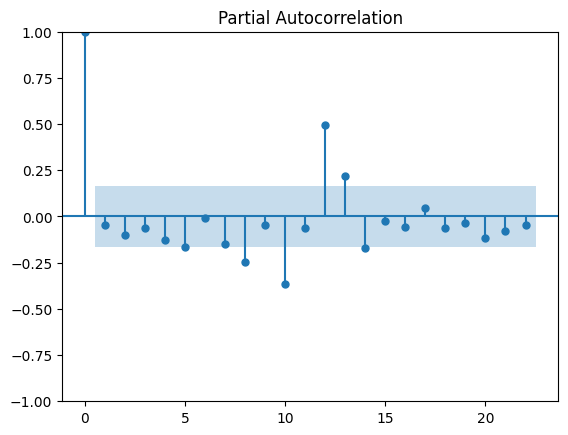

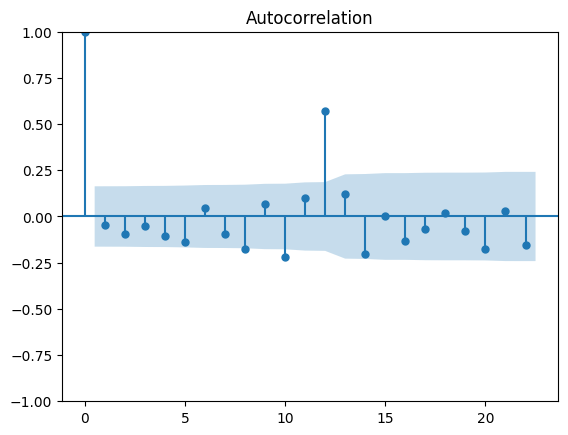

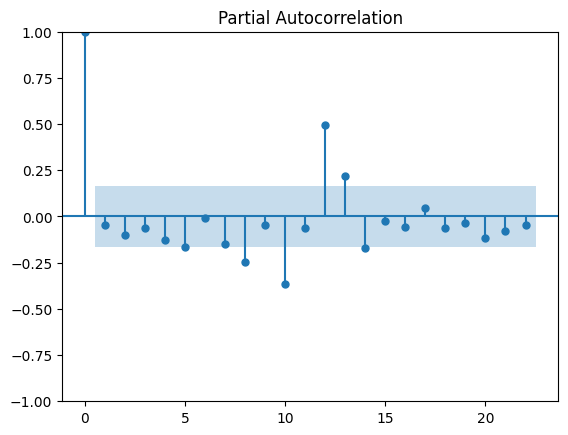

In [ ]:
print(results.summary())
sm.graphics.tsa.plot_acf(results.resid)
sm.graphics.tsa.plot_pacf(results.resid)


**Forecasting:**
Finally, you can use the fitted ARIMA model to make predictions and generate forecasts.

In [ ]:
forecast = results.get_forecast(steps=20)  # n is the number of steps ahead you want to forecast
forecast_mean = forecast.predicted_mean


**Visualization:**
Visualize the observed data and the forecasted values.

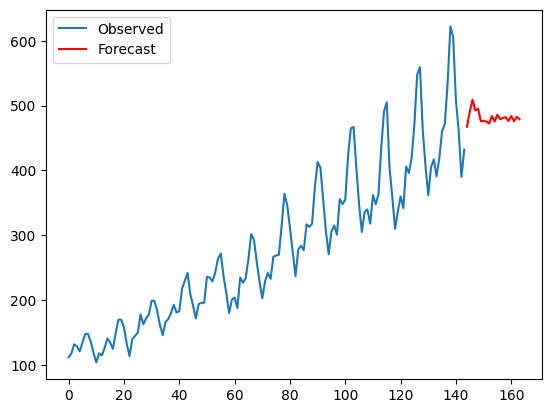

In [ ]:
plt.plot(data['#Passengers'], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='r')
plt.legend()
plt.show()


In [ ]:
!pip install matplotlib

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


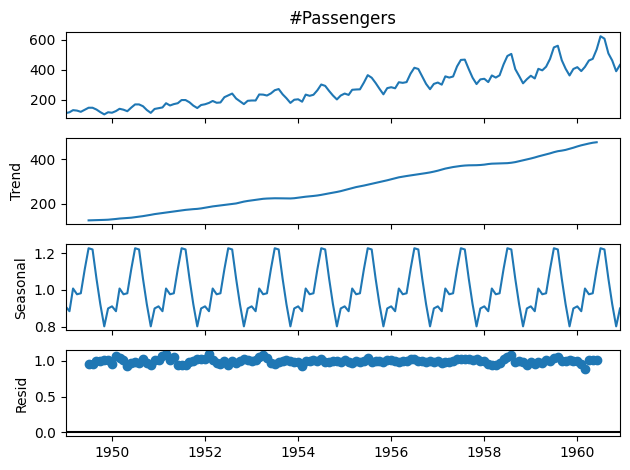

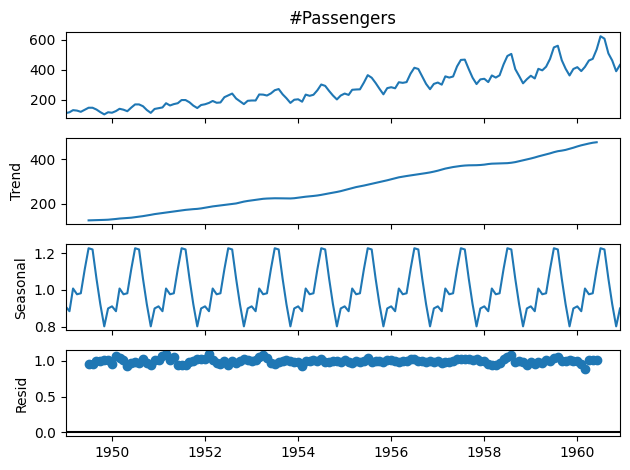

In [35]:


# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
airline = pd.read_csv('/content/drive/MyDrive/Resume/2023/Practice_Python_SQL_PYsrpak/AirPassengers.csv',
                       index_col ='Month',
                       parse_dates = True)

# Print the first five rows of the dataset
display(airline.head())

# ETS Decomposition
result = seasonal_decompose(airline['#Passengers'],
                            model ='multiplicative')

# ETS plot
result.plot()

In [25]:
# To install the library
# pip install pmdarima

# Import the library
# from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=1.93 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.95 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=1.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.26 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=1.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=14.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=2.02 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=1.09 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.99 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=2.62 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.80 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=11.49 sec
 ARIMA(0,1,1)(1,1,1)[12]   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 18 Oct 2023   AIC                           1019.178
Time:                                     17:03:26   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['#Passengers'],
				order = (0, 1, 1),
				seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.013
Date:                            Wed, 18 Oct 2023   AIC                            896.027
Time:                                    17:05:47   BIC                            909.922
Sample:                                01-01-1949   HQIC                           901.669
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2982      0.076     -3.934      0.000      -0.447      -0.150
ar.S.L12       0.7105      0.237      2.998      0.003       0.246       1.175
ar.S.L24       0.2886      0.100      2.885      0.004       0.093       0.485
ma.S.L12      -0.9800      2.262     -0.433      0.665      -5.413       3.453
sigma2        88.2971    179.432      0.492      0.623    -263.384     439.978
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

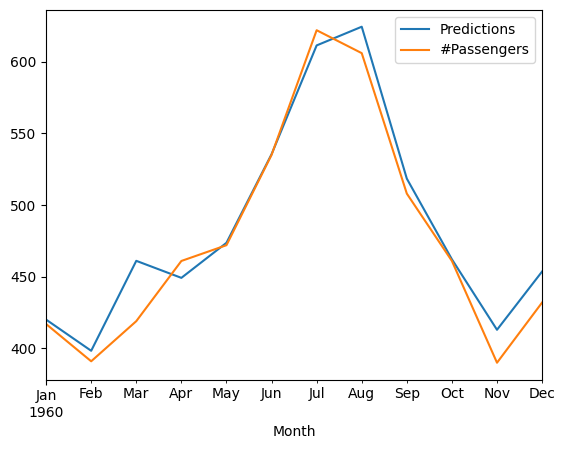

In [27]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)


In [28]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["#Passengers"], predictions)

# Calculate mean squared error
mean_squared_error(test["#Passengers"], predictions)


294.7098442702099

<Axes: xlabel='Month'>

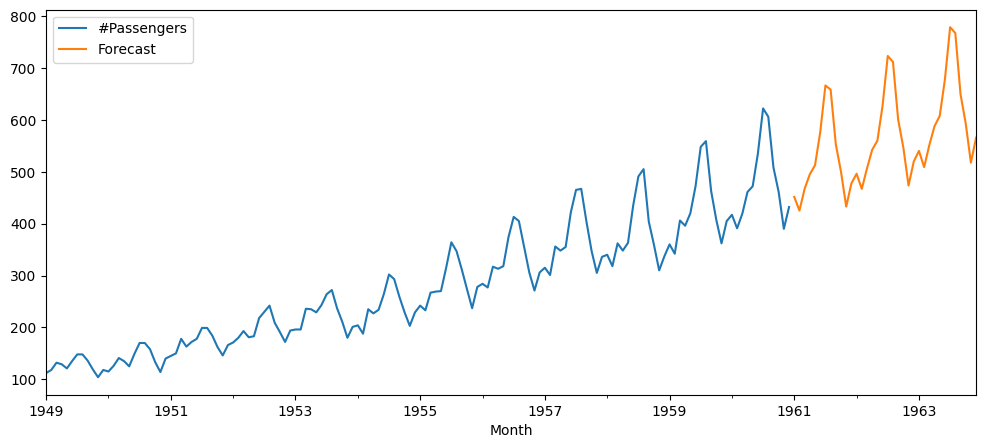

In [29]:
# Train the model on the full dataset
model = model = SARIMAX(airline['#Passengers'],
						order = (0, 1, 1),
						seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 3 * 12,
						typ = 'levels').rename('Forecast')

# Plot the forecast values
airline['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [37]:
data = pd.read_csv('/content/drive/MyDrive/Resume/2023/Practice_Python_SQL_PYsrpak/students.csv')

In [40]:
display(data.head(2))

,Hours Studied,Exam Outcome
0,2.5,0
1,3.0,0


In [45]:
data.columns

Index([' Hours Studied ', ' Exam Outcome '], dtype='object')

In [47]:
X = data[[' Hours Studied ']]
Y = data[' Exam Outcome ']

In [50]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [51]:
# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [52]:
Y_pred = model.predict(X_test)

In [53]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)

In [54]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

Accuracy: 1.0
Confusion Matrix:
[[2 0]
 [0 8]]


In [56]:
data = pd.read_csv('/content/drive/MyDrive/Resume/2023/Practice_Python_SQL_PYsrpak/freezer.csv')

In [57]:
data.columns

Index(['Temperature', 'Out_of_Range'], dtype='object')

In [61]:
X = data[['Temperature']]
Y = data['Out_of_Range']

In [62]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [64]:
# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [65]:
Y_pred = model.predict(X_test)

In [66]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)

In [67]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.7777777777777778
Confusion Matrix:
[[40  0]
 [12  2]]
